# Neural Networks
__MATH 3480__ - Dr. Michael Olson

Reading:
* Geron, Chapter 5

## History

* The concept of a neural network was first theorized in 1943
* Technique of the Perceptron was introduced in 1958 by Frank Rosenblatt
  * Belief that ANNs (Artificial Neural Networks) would soon be able to translate languages on the fly
* Due to lack in technology and in data, funding failed and focuses shifted to other methods
  * "AI Winter"
* ImageNet 2012 - Large Scale Visual Recognition Challenge
  * Reintroduced Neural Networks
 
Today, systems are using ANNs everywhere (e.g. Apple and Google for speech and image recognition).

## The Perceptron

In a one-layer neural network, also known as a __perceptron__, only does one calculation. There are two parts:
* An input layer
* An output layer (where the calculation happens)

The value of the perceptron is some function of the input layer. For example,
$$y=x_1 + x_2 + \dots + x_n$$

In [2]:
x1 = np.array([5,13])
x2 = np.array([4,1])
x1,x2

(array([ 5, 13]), array([4, 1]))

Sometimes, the value is not a direct sum. It is often a weighted sum, and the goal of the perceptron is to find the right weights.
$$y = w_1x_1 + w_2x_2 + \dots + w_nx_n$$

Notice how this is a lot like a linear regression. It is just a version of,
$$AX=Y \qquad \left[a_1,a_2,\dots,a_n\right]\begin{bmatrix}
\vdots & \vdots & & \vdots \\
x_1 & x_2 & \dots & x_n \\
\vdots & \vdots & & \vdots
\end{bmatrix}=\left[y_1,y_2,\dots,y_n\right]$$

So, at this point, this really is just a simple linear algebra problem, which we could solve using the Pseudoinverse:
$$A=YX^\dagger$$

In [3]:
w = ([0.4, 0.9])
sum(w*x1),sum(w*x2)

(13.700000000000001, 2.5)

But what if all $x_i=0$? Then the weights won't do anything and the perceptron becomes dead or useless. So, to prevent a zero value, we have to add in a bias term. This bias term can be positive or negative, and it can be large or small.
$$y = w_1x_1 + w_2x_2 + \dots + w_nx_n + b$$
$$y = \sum_i w_i x_i + b$$

In [4]:
b = -10
sum(w*x1)+b, sum(w*x2)+b

(3.700000000000001, -7.5)

This is the basic idea of the function of a perceptron. The result would be the value, or __activation__, of the output neuron(s).

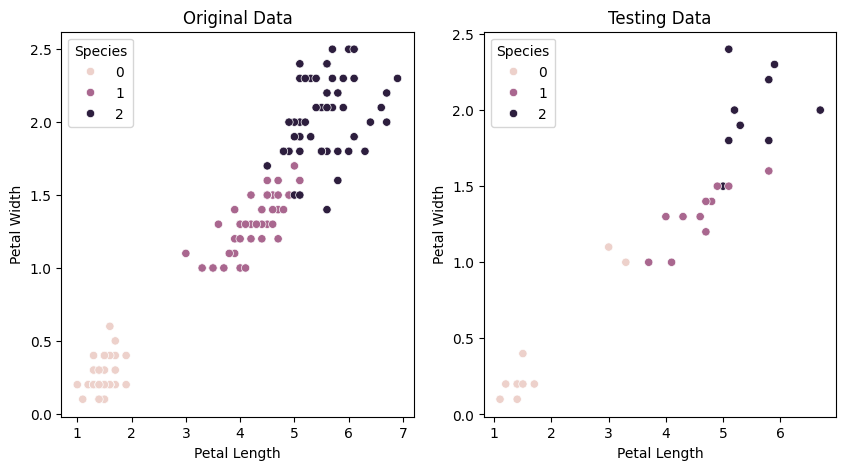

[[8 0 0]
 [2 9 0]
 [0 2 9]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.82      0.82      0.82        11
           2       1.00      0.82      0.90        11

    accuracy                           0.87        30
   macro avg       0.87      0.88      0.87        30
weighted avg       0.88      0.87      0.87        30



In [18]:
#####   LOAD THE DATA   #####
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data#[:, (2,3)] # petal length, petal width
#y = (iris.target == 0).astype(np.int) # Iris setosa
y = iris.target

#####   CROSS VALIDATION   #####
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)

#####   TRAIN THE PERCEPTRON MODEL   #####
from sklearn.linear_model import Perceptron
per_clf = Perceptron()
per_clf.fit(X_train,y_train)

#####   PREDICT FOR THE TEST DATA   #####
y_pred = per_clf.predict(X_test)
y_pred

#####   PLOT   #####
#import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
X_df = pd.DataFrame(X, columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])
X_df['Species'] = pd.DataFrame(y)
sns.scatterplot(data=X_df, x='Petal Length', y='Petal Width', hue='Species', ax=ax1)
ax1.set_title('Original Data')

ax2 = fig.add_subplot(122)
Xtest_df = pd.DataFrame(X_test, columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])
Xtest_df['Species'] = pd.DataFrame(y_pred)
sns.scatterplot(data=Xtest_df, x='Petal Length', y='Petal Width', hue='Species', ax=ax2)
ax2.set_title('Testing Data')

plt.show()

#####   EVALUATION   #####
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Two issues:
1. Need more data to train the model (80% * 150 = 120)
2. This is basically a multi-linear regression - we can do better

## Activation Functions

The activation is the value of a particular neuron. The connection that activates a neuron produces a number. Before, we have just dealt with a linear function. Most activation functions are nonlinear.
* *Linear function*
$$y=\sum_i w_ix_i + b$$

However, activation functions are not always linear. Often, we want it to be a number between 0 and 1. There are a few ways to do this:
* *Step function*, also known as the *Threshold Logic Unit (TLU)* or *Linear Threshold Unity (LTU)*
![Step Curve](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Activation_binary_step.svg/120px-Activation_binary_step.svg.png)

In [5]:
z1 = sum(w*x1)+b
z2 = sum(w*x2)+b
max(0, abs(z1)/z1), max(0,abs(z2)/z2)

(1.0, 0)

* *Sigmoid function* (or Logical function)
  * More sensitive to small changes
$$\sigma(z) = \frac{1}{1+e^{-z}} \qquad \sigma(\mathbf{w}\cdot\mathbf{x}+b) = \frac{1}{1+e^{-(\mathbf{w}\cdot\mathbf{x}+b)}}$$
![Sigmoid Curve](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Activation_logistic.svg/120px-Activation_logistic.svg.png)

In [6]:
1/(1+np.exp(-z1)), 1/(1+np.exp(-z2))

(0.9758729785823308, 0.0005527786369235996)

* *Hyperbolic Tangent*
  * This one acts like the Sigmoid function, but goes from -1 to 1
$$\tanh(z)=\frac{e^z - e^{-z}}{e^z + e^{-z}} \qquad \tanh(\mathbf{w}\cdot\mathbf{x}+b)$$
![Hyperbolic Tangent Curve](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Activation_tanh.svg/120px-Activation_tanh.svg.png)

In [7]:
np.tanh(z1), np.tanh(z2)

(0.9987782412811311, -0.9999993881955461)

* *Rectified Linear Unit (ReLU)*
  * $y=\max\{0,\mathbf{w}\cdot\mathbf{x}+b\}$
![ReLU Curve](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Activation_rectified_linear.svg/120px-Activation_rectified_linear.svg.png)

In [8]:
max(0,z1), max(0,z2)

(3.700000000000001, 0)

There are many other activation functions. However, in order to train our network, our activation function needs to be differentiable.

## Hidden Layers

Knowing the basic perceptron, we can Sometimes, we have a second or third step. These extra layers between the input layer and output layer are called __hidden layers__, and a basic neural network with 1 or more hidden layers is a __multi-layer perceptron__, a basic __artificial neural network__.

### Some basic terminology
* The __width of a layer__ is the number of neurons within that layer
* The __depth of a network__ is the number of (*Hidden?*) layers in a network
* An ANN becomes a __Deep Neural Network__ when there are 2 or more hidden layers

## Training an ANN

An ANN most often doesn't get it right the first time. The program has to iterate through the network multiple times to get it right. Each iteration updates the activators (neurons) to improve the result. The activators are updated with new weights in a variety of ways.

The most common way to update weights in an activator is via gradient descent:
$$w_{ij}'=w_{ij} + \eta\left(y_i - \hat{y}_i\right)x_i$$
where
* $w_{ij}$ is the current weight, and $w_{ij}'$ is the updated weight
* $\eta$ is the learning rate
* $x_i$ is the input
* $y_i$ is the target output
* $\hat{y}_i$ is the actual output using the weight of $w_{ij}$

This is the algorithm developed by Frank Rosenblatt in 1958, inspired by *Hebb's Rule*, which was published in 1949. 

## ANNs Today

The result of these neural networks are quite good.
* [Mona Lisa can talk!](https://www.youtube.com/watch?v=P2uZF-5F1wI)
* [Mark Rober - Stealing Baseball Signs with a Phone](https://www.youtube.com/watch?v=PmlRbfSavbI)

Are Neural Networks perfect yet? No...
* [Neurabites.com](https://neurabites.com/muffin-or-chihuahua/)

## Cautions

* ANNs are relatively easy to train. However, because it's so easy, many people are just using ANNs without understanding what is happening under the hood.

Some of the issues:
* Easy to overfit
  * There are some cases where we want very specific results, but it's very easy to overfit
* Not very good when we want to generalize things
  * Not very good with learning physics (model it to predict where a cannonball lands, but it can't use that to launch a rocket)
* Interpretable/Explainable
  * The number of neurons adds a large number of degrees of freedom which makes it very expressive
  * More degrees of freedom makes it more complicated and harder to interpret
* Incorporating Physics
  * It is a difficult process to incorporate our knowledge of the real world
  * True for all ML Algorithms, but especially for ANNs.